Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.
Draw the inferences from the clusters obtained.

# EastWestAirlines

In [1]:
#import hierarchical clustering libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


In [2]:
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines (2).xlsx to EastWestAirlines (2).xlsx


In [3]:
data=pd.read_excel('EastWestAirlines (2).xlsx')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
#normalization function
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)

In [7]:
#normalization data frame
df_norm =norm_func(data.iloc[:,1:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


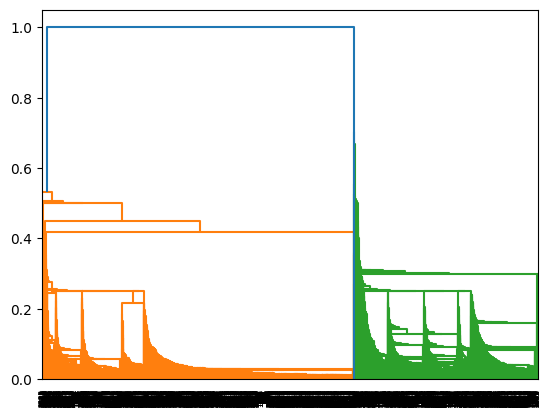

In [8]:
#help (sch.dendrogram)
#create dendrogram
dendrogram=sch.dendrogram(sch.linkage(df_norm, method='single'))

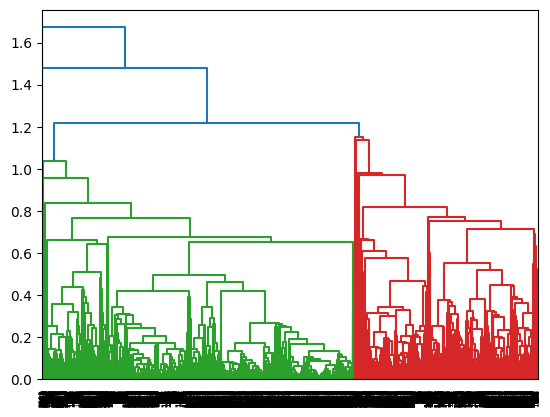

In [9]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average'))

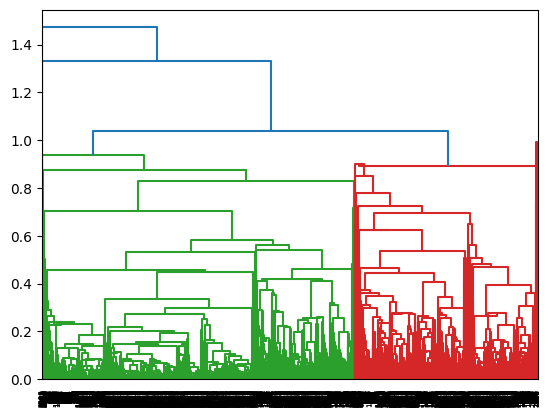

In [10]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='centroid'))


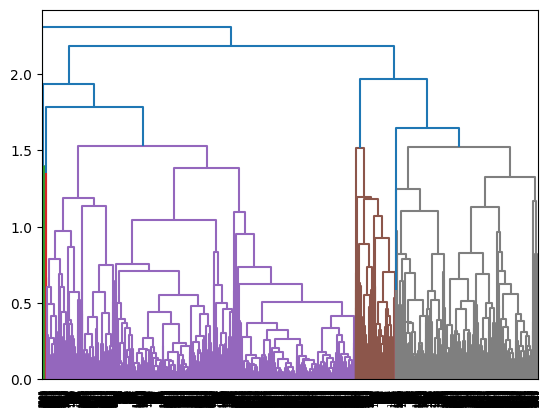

In [11]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [12]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [13]:
y_hc=hc.fit_predict(df_norm)
y_hc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, ..., 0, 2, 2])

In [14]:

data['h_clusterid']=y_hc
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [15]:
data.groupby('h_clusterid').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
h_clusterid,,,,,,,,,,,,
0,1742.863172,97189.586113,239.728387,2.670524,1.007488,1.014295,28739.993193,15.588836,801.789653,2.449285,4628.761743,1.000000
1,3128.000000,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
2,2171.213381,59791.056611,88.188836,1.703484,1.018606,1.011085,10324.882423,9.192003,230.441013,0.672209,3824.887965,0.003167


<Axes: xlabel='Balance', ylabel='Bonus_miles'>

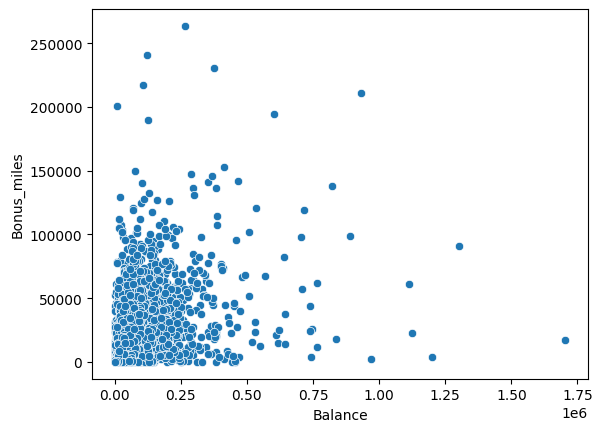

In [16]:
sns.scatterplot(data=data,x='Balance',y='Bonus_miles')


## k-means

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [18]:
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines (2).xlsx to EastWestAirlines (2) (1).xlsx


In [19]:
data=pd.read_excel('EastWestAirlines (2).xlsx')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data_df=scaler.fit_transform(data.iloc[:,1:])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

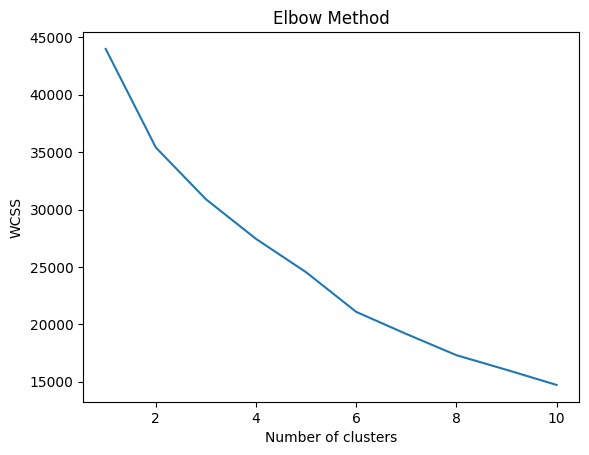

In [22]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [45]:
clusters_new=KMeans(6,random_state=0)
clusters_new.fit(scaled_data_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

In [46]:
clusters_new.labels_

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [50]:
data['clusterid_new']=clusters_new.labels_
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,2


In [51]:
clusters_new.cluster_centers_

array([[ 1.13686833,  0.4142613 ,  0.1345493 , -0.09824189, -0.06276658,
         0.65640088,  1.70548646,  3.77107713,  4.00212558,  0.27153799,
         0.88395812],
       [ 0.43381284, -0.11301262,  1.21014978, -0.09824189, -0.05449778,
         0.92813517,  0.75269133, -0.08065818, -0.08956555,  0.37079373,
         0.57854007],
       [-0.29444721, -0.12883455, -0.60151188, -0.09824189, -0.06071593,
        -0.51682757, -0.4934919 , -0.18636264, -0.19845942, -0.19791068,
        -0.34993321],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735],
       [ 0.45710365,  6.73109194, -0.04322862, -0.09824189, -0.06276658,
         0.06371677,  0.06535804,  0.3596938 ,  0.39424679, -0.07122344,
         0.387

In [52]:
data.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1743.867133,188155.664336,464.573427,2.244755,1.000000,1.000000,32995.580420,27.979021,5739.692308,16.552448,4679.251748,0.797203,-0.531469
1,1,1599.831858,117176.916331,58.446500,3.720837,1.000000,1.001609,39485.872084,18.811746,346.617860,1.032180,4887.485921,0.649236,0.564763
2,2,2233.860465,43882.372895,43.558140,1.229751,1.000000,1.000401,4644.210104,6.852847,199.160385,0.621091,3706.378508,0.200882,0.200481
3,3,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,0.116279
4,4,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,-1.000000
5,5,2057.295082,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377,-0.639344


<Axes: >

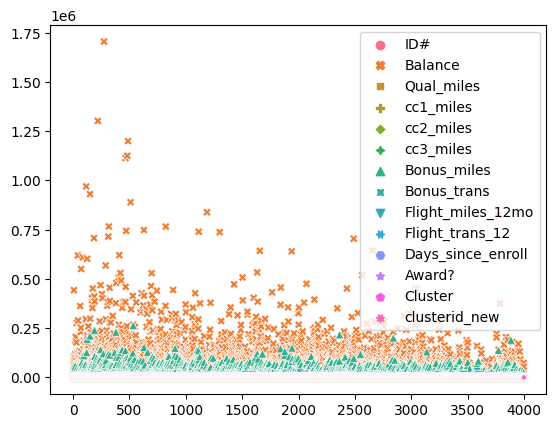

In [53]:
import seaborn as sns
sns.scatterplot(data=data)

# DBSCAN

In [74]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines (2).xlsx to EastWestAirlines (2) (4).xlsx


In [76]:
data=pd.read_excel('EastWestAirlines (2).xlsx')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [78]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [79]:
array=data.values
array

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]])

In [81]:
stscaler=StandardScaler().fit(array)
x=stscaler.transform(array)
x

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [82]:
dbscan=DBSCAN(eps=2,min_samples=8)
dbscan.fit(x)


DBSCAN(eps=2, min_samples=8)

In [85]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [86]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [87]:
pd.concat([data,cl],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,0


<Axes: >

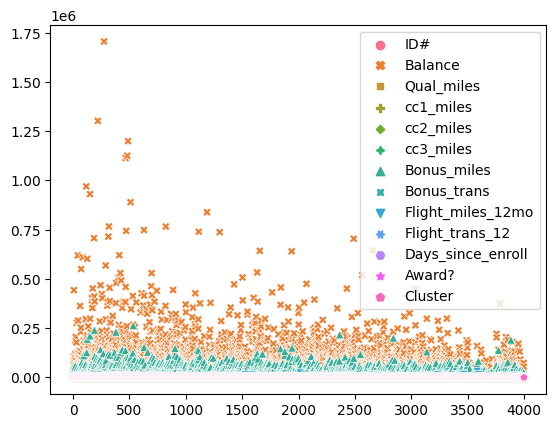

In [89]:
import seaborn as sns
sns.scatterplot(data=data)

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

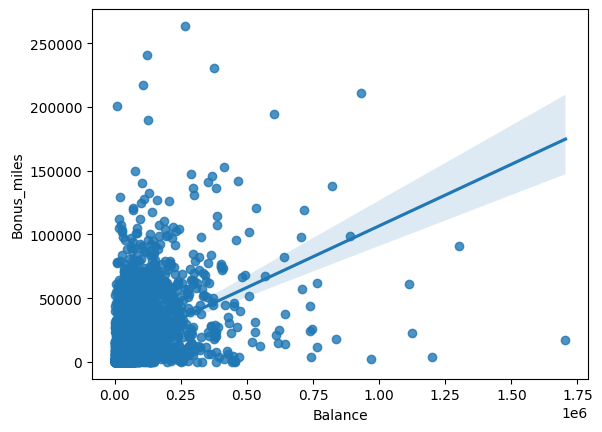

In [91]:
sns.regplot(data=data,x='Balance',y='Bonus_miles')